In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Customers.csv to Customers.csv
Saving Products.csv to Products.csv
Saving Transactions.csv to Transactions.csv


Customers Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None   CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  ----

<ipython-input-28-ab66cd6a1292>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customer_spending.head(10).index, y=top_customer_spending.head(10).values, palette=["#FFFF00"]*10)


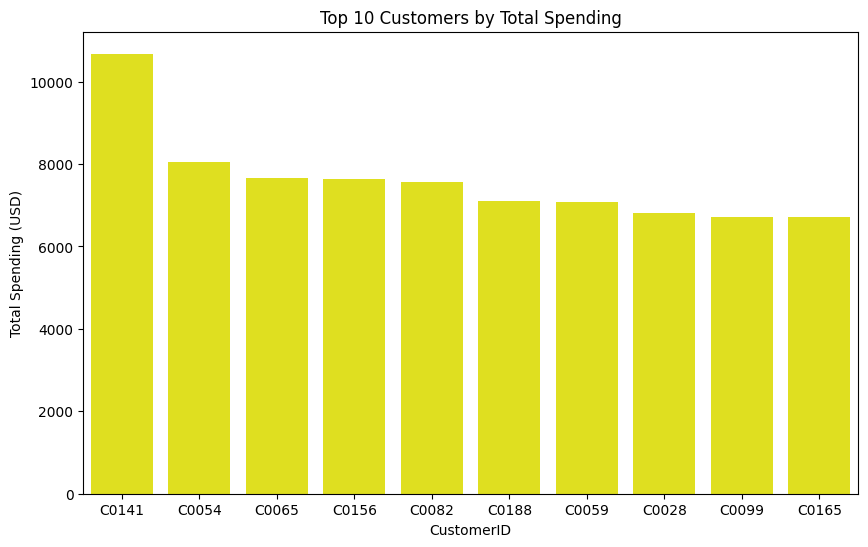

<ipython-input-28-ab66cd6a1292>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_product_sales.head(10).index, y=top_product_sales.head(10).values, palette=["#FFFF00"]*10)


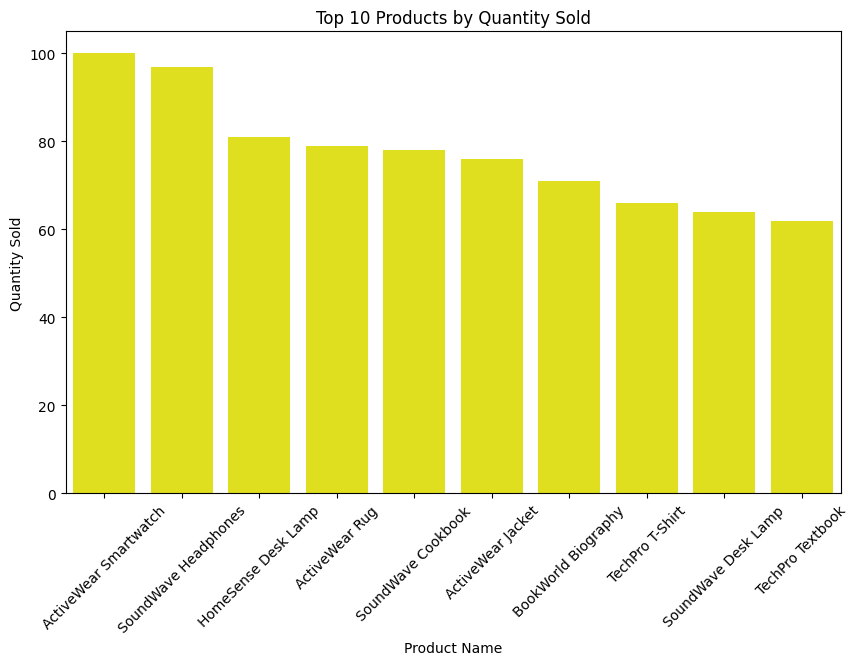

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
customer_data = pd.read_csv('Customers.csv')
product_data = pd.read_csv('Products.csv')
transaction_data = pd.read_csv('Transactions.csv')
print("Customers Dataset Overview:")
print(customer_data.info(), customer_data.head())
print("\nProducts Dataset Overview:")
print(product_data.info(), product_data.head())
print("\nTransactions Dataset Overview:")
print(transaction_data.info(), transaction_data.head())
print("\nMissing Values in Each Dataset:")
print("Customers:", customer_data.isnull().sum())
print("Products:", product_data.isnull().sum())
print("Transactions:", transaction_data.isnull().sum())
combined_data = transaction_data.merge(customer_data, on='CustomerID').merge(product_data, on='ProductID')
top_customer_spending = combined_data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)
top_product_sales = combined_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_customer_spending.head(10).index, y=top_customer_spending.head(10).values, palette=["#FFFF00"]*10)
plt.title("Top 10 Customers by Total Spending")
plt.ylabel("Total Spending (USD)")
plt.xlabel("CustomerID")
plt.show()
plt.figure(figsize=(10, 6))
sns.barplot(x=top_product_sales.head(10).index, y=top_product_sales.head(10).values, palette=["#FFFF00"]*10)
plt.title("Top 10 Products by Quantity Sold")
plt.ylabel("Quantity Sold")
plt.xlabel("Product Name")
plt.xticks(rotation=45)
plt.show()
